<a href="https://colab.research.google.com/github/SaiNikhil1783/I-HUB-DATA-IIITH/blob/main/AIML_Module_3_Lab_3_Using_KNN_for_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
### MODULE: CLASSIFICATION-1
### LAB-3 : Using KNN for Text Classification


---

## **Section 1: Understanding NLP tools**

In this lab we will be using KNN on a real world NLP application i.e. is text classification. But first look at some NLP techniques for text classification and tools that we use when we want to use python for NLP.

## Section 1.2: Data Cleaning and Preprocessing step

Raw text must be processed and converted into a form so that it is suitable to use with various machine-learning algorithms.  
In case of text, there are lots of things that need to be taken into account.  


1.   Removing numbers from the text
2.   Handling capitalization and punctuation.
3.   Stemming and Lemmatizing text.  

And most importantly, one can't just use words or images directly in algorithms; they need to be converted into vectors- a form that algorithms can understand.



### **NLTK**
NLTK (or Natural Language Tool Kit) is a commonly used library for processing text. We will use this tool in this lab. Lets first install it.


In [4]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [2]:
import re
import numpy
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize
from nltk import pos_tag
from nltk.corpus import wordnet
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from bs4 import BeautifulSoup

def cleanText(text, lemmatize, stemmer):
    """Method for cleaning text from train and test data. Removes numbers, punctuation, and capitalization. Stems or lemmatizes text."""

    if isinstance(text, float):
        text = str(text)
    if isinstance(text, numpy.int64):
        text = str(text)
    try:
        text = text.decode()
    except AttributeError:
        pass

    soup = BeautifulSoup(text, "lxml")
    text = soup.get_text()
    text = re.sub(r"[^A-Za-z]", " ", text)
    text = text.lower()


    if lemmatize:
        wordnet_lemmatizer = WordNetLemmatizer()

        def get_tag(tag):
            if tag.startswith('J'):
                return wordnet.ADJ
            elif tag.startswith('V'):
                return wordnet.VERB
            elif tag.startswith('N'):
                return wordnet.NOUN
            elif tag.startswith('R'):
                return wordnet.ADV
            else:
                return ''

        text_result = []
        tokens = word_tokenize(text)  # Generate list of tokens
        tagged = pos_tag(tokens)
        for t in tagged:
            try:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0], get_tag(t[1][:2])))
            except:
                text_result.append(wordnet_lemmatizer.lemmatize(t[0]))
        return text_result

    if stemmer:
        text_result = []
        tokens = word_tokenize(text)
        snowball_stemmer = SnowballStemmer('english')
        for t in tokens:
            text_result.append(snowball_stemmer.stem(t))
        return text_result

In [9]:
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

def cleanText(text, lemmatize=False, stemmer=False):
    # Tokenize the text
    tokens = word_tokenize(text)

    # Initialize lemmatizer and stemmer
    lemmatizer = WordNetLemmatizer()
    stemmer_obj = PorterStemmer()

    # Apply lemmatization or stemming
    if lemmatize:
        tokens = [lemmatizer.lemmatize(token) for token in tokens]
    elif stemmer:
        tokens = [stemmer_obj.stem(token) for token in tokens]

    return tokens


In [12]:
import nltk

# Download required NLTK resources
nltk.download('punkt')  # Tokenizer
nltk.download('wordnet')  # Lemmatization
nltk.download('omw-1.4')  # Lemmatizer's optional multilingual support
nltk.download('stopwords')  # Stopwords, if used in your function
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [13]:
sample_text = "Troubling"

# Test with stemming
sample_text_result = cleanText(sample_text, lemmatize=False, stemmer=True)
sample_text_result = " ".join(sample_text_result)
print("With Stemming:", sample_text_result)

# Test with lemmatization
sample_text_result = cleanText(sample_text, lemmatize=True, stemmer=False)
sample_text_result = " ".join(sample_text_result)
print("With Lemmatization:", sample_text_result)


With Stemming: troubl
With Lemmatization: Troubling


In [14]:
sample_text = "Troubling"
sample_text_result = cleanText(sample_text, lemmatize=False, stemmer=True)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text)
print(sample_text_result)
sample_text_result = cleanText(sample_text, lemmatize=True, stemmer=False)
sample_text_result = " ".join(str(x) for x in sample_text_result)
print(sample_text_result)

Troubling
troubl
Troubling


## Section 1.2: BAG OF WORDS

A bag-of-words model, or BoW for short, is a way of extracting features from text for use in modeling, such as with machine learning algorithms.

The approach is very simple and flexible, and can be used in many ways for extracting features from documents.

A bag-of-words is a representation of text that describes the occurrence of words within a document.
It is called a “bag” of words, because any information about the order or structure of words in the document is discarded. The model is only concerned with whether known words occur in the document, not where in the document.

In [15]:
5*12

60

In [16]:
# Functions to convert document(s) to a list of words, with the option of removing stopwords. Returns document-term matrix.

def createBagOfWords(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = CountVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer = CountVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    bag_of_words_train = vectorizer.fit_transform(clean_train).toarray()
    bag_of_words_test = vectorizer.transform(clean_test).toarray()
    return bag_of_words_train, bag_of_words_test


## Section 1.3: TF-IDF
TF-IDF technique is used to find meaning of sentences consisting of words and cancels out the incapabilities of Bag of Words technique which is good for text classification or for helping a machine read words in numbers.

The number of times a term occurs in a document is called its Term frequency (TF).

 Document frequency is the number of documents in which the word is present.  Inverse DF (IDF) is the inverse of the document frequency which measures the informativeness of term *t*.




In [17]:
def createTFIDF(train, test, remove_stopwords, lemmatize, stemmer):
    if remove_stopwords:
        vectorizer = TfidfVectorizer(analyzer='word', input='content', stop_words=stopwords.words('english'))
    else:
        vectorizer =  TfidfVectorizer(analyzer='word', input='content')

    clean_train = []
    for paragraph in train:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_train.append(paragraph)

    clean_test = []
    for paragraph in test:
        paragraph_result = cleanText(paragraph, lemmatize, stemmer)
        paragraph = " ".join(str(x) for x in paragraph_result)
        clean_test.append(paragraph)

    tfidf_train = vectorizer.fit_transform(clean_train).toarray()
    tfidf_test = vectorizer.transform(clean_test).toarray()
    return tfidf_train, tfidf_test

# **Section 2: UNDERSTANDING THE DATA : A REVIEWS DATASET**

Sentiment analysis is the interpretation and classification of emotions (such as positive, negative and neutral) within text data using text analysis techniques.  
Given below is a dataset consisting of reviews along with sentiment class (positive or negative).

In [18]:
# Upload the Reviews CSV file that has been shared with you.
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving reviews.csv to reviews.csv


In [19]:
import pandas as pd
df = pd.read_csv('reviews.csv')

In [20]:
df = df.dropna()

In [21]:
df

,sentence,sentiment
0,Not sure who was more lost - the flat characte...,0
1,Attempting artiness with black & white and cle...,0
2,Very little music or anything to speak of.,0
3,The best scene in the movie was when Gerardo i...,1
4,"The rest of the movie lacks art, charm, meanin...",0
...,...,...
994,I just got bored watching Jessice Lange take h...,0
995,"Unfortunately, any virtue in this film's produ...",0
996,"In a word, it is embarrassing.",0
997,Exceptionally bad!,0


In [22]:
df.to_csv('reviews.csv', index=False)

# **Section 3: KNN MODEL**

Given below are two KNN models; in the first case we are using Bag-of-Words and in the second case we are using TF-IDF.
Note the different metrics and parameters used in each.

In [23]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 1: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('reviews.csv')
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"],
                                                        test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    # print(X_train)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2,
                                         metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [34]:
import pandas as pd
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Function to create Bag-of-Words representation
def createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False):
    vectorizer = CountVectorizer(stop_words='english' if remove_stopwords else None)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    return X_train_bow, X_test_bow

# Function to create TF-IDF representation
def createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False):
    vectorizer = TfidfVectorizer(stop_words='english' if remove_stopwords else None)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

# Bag-of-Words with KNN
def bow_knn():
    """Method for determining nearest neighbors using Bag-of-Words and K-Nearest Neighbor algorithm"""
    # Load dataset
    training_data = pd.read_csv('reviews.csv')  # Ensure your file path is correct
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)

    # Create Bag-of-Words representation
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)

    # Initialize KNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='euclidean')

    # Train and evaluate KNN
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = {:.2f}%'.format(acc * 100))

    # Cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: {:.2f}%".format(scores.mean() * 100))
    print(scores)
    print('\n')
    return predicted, y_test

# TF-IDF with KNN
def tfidf_knn():
    """Method for determining nearest neighbors using TF-IDF and K-Nearest Neighbor algorithm"""
    # Load dataset
    training_data = pd.read_csv('reviews.csv')  # Ensure your file path is correct
    X_train, X_test, y_train, y_test = train_test_split(training_data["sentence"], training_data["sentiment"], test_size=0.2, random_state=5)

    # Create TF-IDF representation
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)

    # Initialize KNN
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', metric='cosine')

    # Train and evaluate KNN
    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = {:.2f}%'.format(acc * 100))

    # Cross-validation
    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: {:.2f}%".format(scores.mean() * 100))
    print(scores)
    return predicted, y_test

# Run both models
predicted_bow, y_test_bow = bow_knn()
predicted_tfidf, y_test_tfidf = tfidf_knn()


KNN with BOW accuracy = 62.83%
Cross Validation Accuracy: 59.56%
[0.60784314 0.56862745 0.61023622]


KNN with TFIDF accuracy = 71.20%
Cross Validation Accuracy: 72.12%
[0.70980392 0.73333333 0.72047244]


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Note: Cross-validation will be discussed in detail in the upcoming lab session.

In [24]:
## KNN accuracy after using BoW
predicted, y_test = bow_knn()

KNN with BOW accuracy = 62.82722513089005%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross Validation Accuracy: 0.60
[0.57254902 0.57254902 0.65354331]




In [25]:
## KNN accuracy after using TFIDF
predicted, y_test = tfidf_knn()

KNN with TFIDF accuracy = 71.20418848167539%


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=3.
  warnings.warn(


Cross Validation Accuracy: 0.75
[0.75686275 0.74509804 0.75590551]


# Section 4: SPAM TEXT DATASET
Now let's use what we've learnt to classify texts as spam or not spam.

In [26]:
# Upload the spam text data CSV file that has been shared with you. You can also download the file from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
# Run this cell, click on the 'Choose files' button and upload the file.
from google.colab import files
uploaded = files.upload()

Saving spam.csv to spam.csv


In [27]:
import pandas as pd
df = pd.read_csv('spam.csv')
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ã¼ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [28]:
df['Category'] = df['Category'].map({'ham': 0, 'spam': 1})

In [29]:
df.head(5)

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [30]:
len(df)

5572

In [ ]:
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

## TASK - 2: Tweak the models below and see results with different parameters and distance metrics.

def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='euclidean', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    print('\n')
    return predicted, y_test


def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""

    training_data = pd.read_csv('spam.csv')
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})
    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)
    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', leaf_size=30, p=2, metric='cosine', metric_params=None, n_jobs=1)

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TFIDF accuracy = ' + str(acc * 100) + '%')

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross Validation Accuracy: %0.2f" % (scores.mean()))
    print(scores)
    return predicted, y_test

In [35]:
import pandas as pd
from sklearn import metrics, neighbors
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Function to create Bag-of-Words representation
def createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False):
    vectorizer = CountVectorizer(stop_words='english' if remove_stopwords else None)
    X_train_bow = vectorizer.fit_transform(X_train)
    X_test_bow = vectorizer.transform(X_test)
    return X_train_bow, X_test_bow

# Function to create TF-IDF representation
def createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False):
    vectorizer = TfidfVectorizer(stop_words='english' if remove_stopwords else None)
    X_train_tfidf = vectorizer.fit_transform(X_train)
    X_test_tfidf = vectorizer.transform(X_test)
    return X_train_tfidf, X_test_tfidf

# Bag-of-Words with KNN
def bow_knn():
    """Method for determining nearest neighbors using bag-of-words and K-Nearest Neighbor algorithm"""
    training_data = pd.read_csv('spam.csv', encoding='latin-1')  # Adjust path if necessary
    training_data = training_data[['Category', 'Message']]
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})

    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createBagOfWords(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)

    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='euclidean')

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with BOW accuracy = {:.2f}%'.format(acc * 100))

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross-Validation Accuracy: {:.2f}%".format(scores.mean() * 100))
    print(scores)
    return predicted, y_test

# TF-IDF with KNN
def tfidf_knn():
    """Method for determining nearest neighbors using tf-idf and K-Nearest Neighbor algorithm"""
    training_data = pd.read_csv('spam.csv', encoding='latin-1')  # Adjust path if necessary
    training_data = training_data[['Category', 'Message']]
    training_data['Category'] = training_data['Category'].map({'ham': 0, 'spam': 1})

    X_train, X_test, y_train, y_test = train_test_split(training_data["Message"], training_data["Category"], test_size=0.2, random_state=5)
    X_train, X_test = createTFIDF(X_train, X_test, remove_stopwords=True, lemmatize=True, stemmer=False)

    knn = neighbors.KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='brute', metric='cosine')

    knn.fit(X_train, y_train)
    predicted = knn.predict(X_test)
    acc = metrics.accuracy_score(y_test, predicted)
    print('KNN with TF-IDF accuracy = {:.2f}%'.format(acc * 100))

    scores = cross_val_score(knn, X_train, y_train, cv=3)
    print("Cross-Validation Accuracy: {:.2f}%".format(scores.mean() * 100))
    print(scores)
    return predicted, y_test

# Call functions to test
predicted_bow, y_test_bow = bow_knn()
predicted_tfidf, y_test_tfidf = tfidf_knn()

KNN with BOW accuracy = 91.12%
Cross-Validation Accuracy: 90.02%
[0.90309556 0.89434724 0.9030303 ]
KNN with TF-IDF accuracy = 97.40%
Cross-Validation Accuracy: 96.10%
[0.95760431 0.96298789 0.96228956]


In [36]:
# This cell may take some time to run
predicted, y_test = bow_knn()

KNN with BOW accuracy = 91.12%
Cross-Validation Accuracy: 90.02%
[0.90309556 0.89434724 0.9030303 ]


In [37]:
# This cell may take some time to run
predicted, y_test = tfidf_knn()

KNN with TF-IDF accuracy = 97.40%
Cross-Validation Accuracy: 96.10%
[0.95760431 0.96298789 0.96228956]


### Questions to Think About and Answer
1. Why does the TF-IDF approach generally result in a better accuracy than Bag-of-Words ?
2. Can you think of techniques that are better than both BoW and TF-IDF ?
3. Read about Stemming and Lemmatization from the resources given below. Think about the pros/cons of each.

**Why does the TF-IDF approach generally result in better accuracy than Bag-of-Words?**

**Feature Weighting:**

Bag-of-Words (BoW) assigns equal importance to every word, regardless of how commonly it appears in the dataset. This can lead to common words (like "the," "is," etc.) overshadowing less frequent but more informative words.
TF-IDF (Term Frequency-Inverse Document Frequency), on the other hand, weighs words based on their importance. Words that appear frequently in a specific document but are rare in the overall corpus are given higher weight, making it better at distinguishing between categories.

**Dimensionality:**

BoW often creates a very sparse representation, where each unique word corresponds to a dimension. TF-IDF reduces noise by down-weighting common terms, effectively reducing dimensionality and focusing on more meaningful features.

**Relevance to Context:**

BoW does not consider how relevant or informative a word is in the context of classification. TF-IDF adjusts for this by emphasizing terms that are important to specific documents and de-emphasizing terms common across all documents.

**Overfitting:**

BoW can lead to overfitting when the dataset contains many irrelevant features (common words). TF-IDF reduces the impact of these irrelevant features, leading to better generalization.


**Techniques That Are Better Than Both BoW and TF-IDF:**

**Word Embeddings:**

**Description:**

 Word embeddings, such as Word2Vec, GloVe, or FastText, represent words as dense vectors in a continuous vector space. These embeddings capture semantic meaning and relationships between words.

**Advantages:**

Captures semantic and contextual relationships.
Fixed-length representations, irrespective of vocabulary size.
Performs well on downstream tasks like classification and clustering.

**Disadvantages:**

Requires large training data for pre-trained embeddings or fine-tuning.
Computationally intensive.

**Contextualized Embeddings:**

**Description:**

Techniques like BERT (Bidirectional Encoder Representations from Transformers) and ELMo (Embeddings from Language Models) provide dynamic embeddings where the representation of a word changes depending on its context.

**Advantages:**

Handles polysemy (multiple meanings of a word) effectively.
State-of-the-art performance on many NLP tasks.

**Disadvantages:**
Computationally expensive and requires significant resources.
May need fine-tuning for specific tasks.

**Latent Semantic Analysis (LSA):**

**Description:**

A technique that uses Singular Value Decomposition (SVD) on the term-document matrix to reduce dimensions and capture latent relationships between terms.

**Advantages:**

Captures hidden semantic relationships.
Reduces noise by focusing on principal components.

**Disadvantages:**

Assumes linear relationships, which may not always hold.
Computationally intensive for large datasets.

**Latent Dirichlet Allocation (LDA):**

Description: A generative probabilistic model that identifies topics in a collection of documents.

**Advantages:**

Groups words into interpretable topics.
Can reduce dimensionality and highlight semantic structure.

**Disadvantages:**

Requires careful tuning of hyperparameters.
Assumes words in a topic are conditionally independent.

**Transformer Models:**

**Description:**

 Models like GPT (Generative Pre-trained Transformer) and BERT use transformer architectures to generate embeddings and make predictions.

**Advantages:**

Superior performance due to bidirectional context.
Captures long-term dependencies in text.

**Disadvantages:**

Resource-intensive and requires substantial computational power

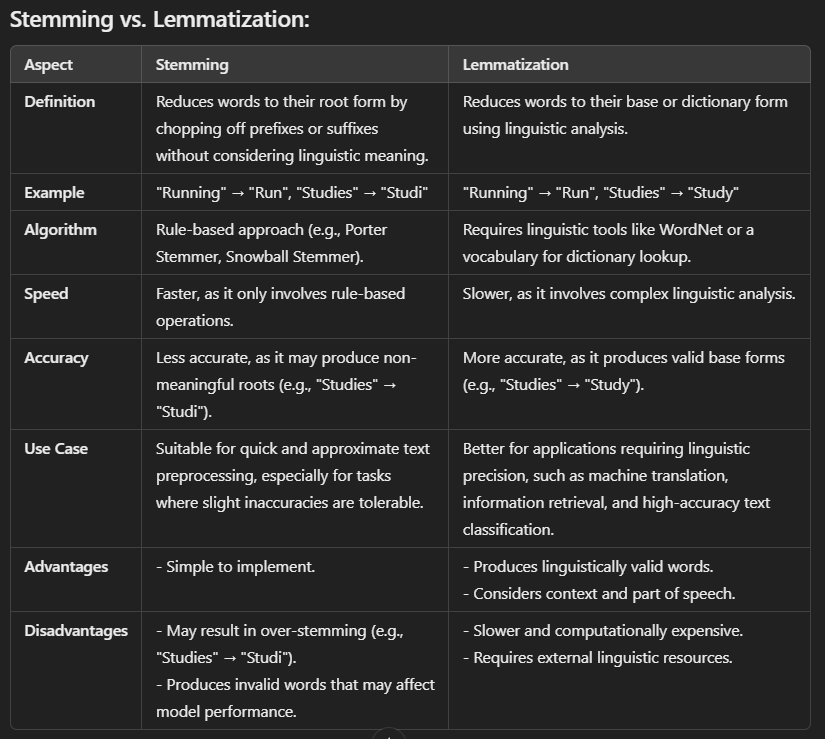

### Useful Resources for further reading
1. Stemming and Lemmatization: https://nlp.stanford.edu/IR-book/html/htmledition/stemming-and-lemmatization-1.html
2. TF-IDF and BoW : https://www.analyticsvidhya.com/blog/2020/02/quick-introduction-bag-of-words-bow-tf-idf/
3. TF-IDF: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
